In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step 1: Preliminary Setup**

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.manifold import MDS

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.linalg import svd
import umap

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CMPE255/netflix_titles.csv', encoding='latin1')
print(df.head())
print(df.info())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# **Step 2: Data Preprocessing**

In [ ]:
# Handling missing values
df = df.dropna()

# Converting categorical variables into numeric representations
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Normalizing/Standardizing data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

<ipython-input-13-c7cd9622ce90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-13-c7cd9622ce90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-13-c7cd9622ce90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

# **Step 3: Dimensionality Reduction Techniques**

# **A)**

# PCA

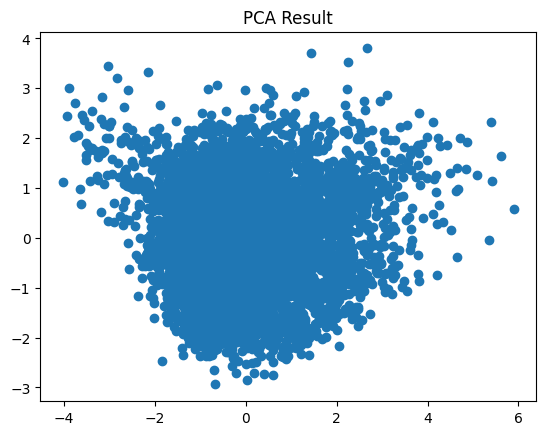

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.show()

# SVD

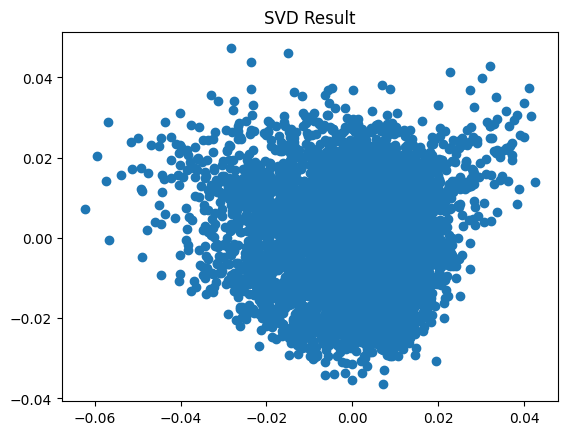

In [ ]:
U, S, Vt = svd(df_scaled, full_matrices=False)
svd_result = U[:, :2]
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.title('SVD Result')
plt.show()

# MDS

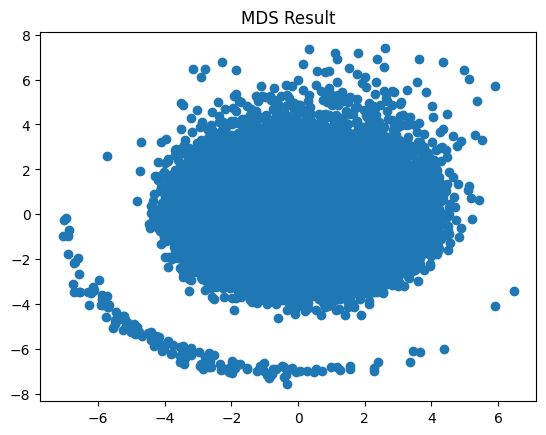

In [ ]:
# Now, perform MDS
mds = MDS(n_components=2, metric=True, n_init=4, max_iter=300, random_state=42, dissimilarity='euclidean', normalized_stress='auto')
mds_result = mds.fit_transform(df_scaled)

# Plot the result
plt.scatter(mds_result[:, 0], mds_result[:, 1])
plt.title('MDS Result')
plt.show()


# ISOMap

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


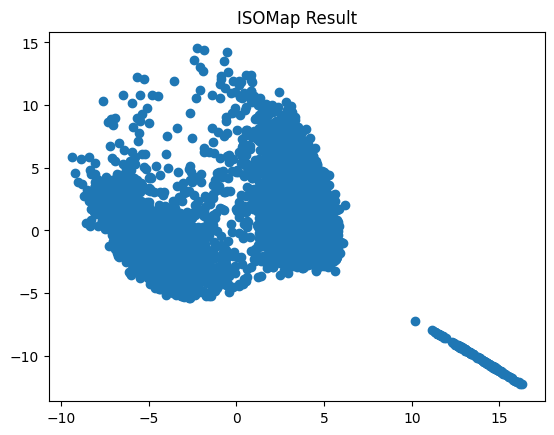

In [ ]:
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(df_scaled)
plt.scatter(isomap_result[:, 0], isomap_result[:, 1])
plt.title('ISOMap Result')
plt.show()

# LLE

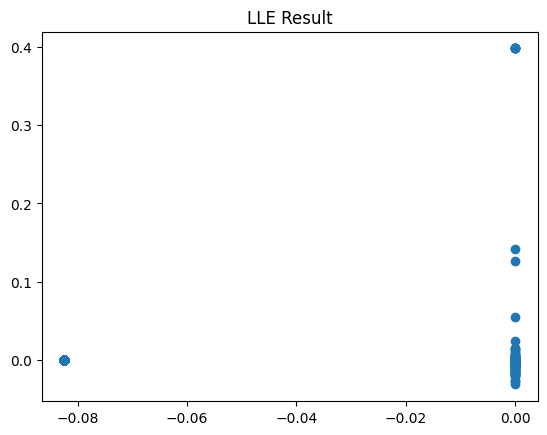

In [ ]:
lle = LocallyLinearEmbedding(n_components=2)
lle_result = lle.fit_transform(df_scaled)
plt.scatter(lle_result[:, 0], lle_result[:, 1])
plt.title('LLE Result')
plt.show()

# **B)**

# UMAP

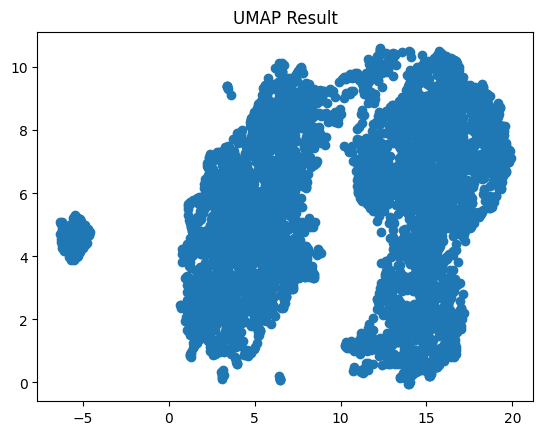

In [ ]:
umap_result = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2).fit_transform(df_scaled)
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title('UMAP Result')
plt.show()

# t-SNE

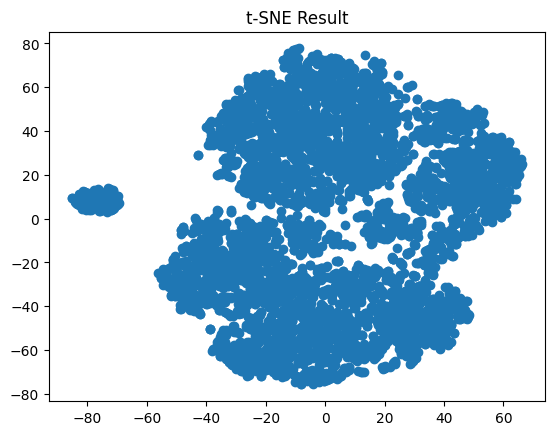

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(df_scaled)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Result')
plt.show()